<a href="https://colab.research.google.com/github/RvM9622/DeepLearning/blob/main/Animals%26Birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
dataset_path="/content/drive/MyDrive/Animal & Bird/Animal & Bird Dataset"
categories = os.listdir(dataset_path)

In [ ]:
data =[]
labels = []

for category in categories:
  folder_path = os.path.join("/content/drive/MyDrive/Animal & Bird/Animal & Bird Dataset", category)
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    data.append(file_path)
    labels.append(category)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.2, random_state =0)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def preprocess_img(data):
  img = load_img(data, target_size = (150,150))
  img_array = img_to_array(img)
  img_array = img_array/255.0
  return img_array

In [ ]:
label_map = {}
for id, category in enumerate(categories):
  label_map[category] = id

In [ ]:
label_map


{'Tiger': 0,
 'Lion': 1,
 'Horse': 2,
 'Goat': 3,
 'Frog': 4,
 'Duck': 5,
 'Dog': 6,
 'Deer': 7,
 'Cat': 8,
 'Bird': 9}

In [ ]:
y_train[:5]

['Frog', 'Frog', 'Horse', 'Bird', 'Bird']

In [ ]:
import numpy as np
y_train1 =[]

for label in y_train:
  y_train1.append(label_map[label])
y_train1= np.array(y_train1)
y_train1[:5]

array([4, 4, 2, 9, 9])

In [ ]:
y_test1 =[]
for label in y_test:
  y_test1.append(label_map[label])
y_test1= np.array(y_test1)
y_test1[:5]

array([6, 6, 0, 7, 7])

In [ ]:

x_train1 =[]
for img in x_train:
  x_train1.append(preprocess_img(img))
x_train1 = np.array(x_train1)
x_train1.shape

(240, 150, 150, 3)

In [ ]:
x_test1 =[]
for img in x_test:
  x_test1.append(preprocess_img(img))
x_test1 = np.array(x_test1)
x_test1.shape

(60, 150, 150, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

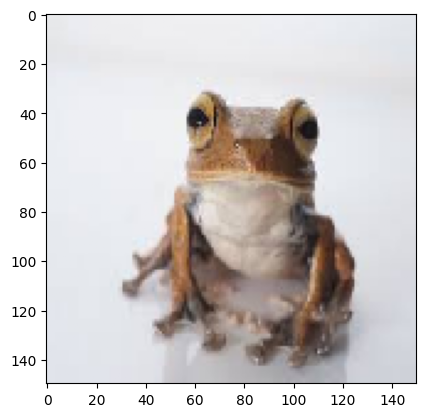

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train1[1])
plt.show

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D

model = tf.keras.Sequential([Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)),
                             MaxPooling2D((2,2)),
                             Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)),
                             AveragePooling2D((2,2)),
                             Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)),
                             MaxPooling2D((2,2)),
                             Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)),
                             AveragePooling2D((2,2)),
                             Flatten(),
                             Dense(128, activation = "relu"),
                             Dense(len(categories),activation = "softmax")])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

In [ ]:
model.fit(x_train1,y_train1, epochs = 10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 788ms/step - accuracy: 0.0833 - loss: 2.3103
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 757ms/step - accuracy: 0.1176 - loss: 2.2944
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 729ms/step - accuracy: 0.2442 - loss: 2.2791
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 841ms/step - accuracy: 0.2097 - loss: 2.2028
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 723ms/step - accuracy: 0.2457 - loss: 2.0784
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 716ms/step - accuracy: 0.4140 - loss: 1.9112
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4230 - loss: 1.7649
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 728ms/step - accuracy: 0.4777 - loss: 1.5620
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 891ms/step - accuracy: 0.5428 - loss: 1.4097
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 978ms/step - accuracy: 0.5814 - loss: 1.1952


In [ ]:
model.evaluate(x_test1, y_test1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.3153 - loss: 2.2100


[2.316807985305786, 0.3166666626930237]

In [ ]:
img_path = "/content/drive/MyDrive/Animal & Bird/Animal & Bird Dataset/Goat/30.jpg"
img = load_img(img_path, target_size = (150,150))
img_array = img_to_array(img)
img_array = img_array/255.0

y_pred = model.predict(np.array([img_array]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Lion


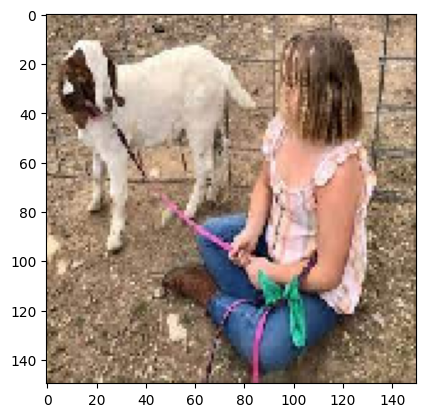

In [ ]:
print(categories[np.argmax(y_pred)])
plt.imshow(img)
plt.show()